In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#抽取200组数据
X_i=[]
epsilon_i=[]
Y_i=[]
for i in range(1000):
    X=np.random.RandomState(i).randn(1,100)
    epsilon=np.random.RandomState(1000+i).randn(1,100)
    X_i.append(X)
    epsilon_i.append(epsilon)
    Y_i.append((np.ones([1,100])+(2*np.array(X))+np.array(epsilon[0])))

In [9]:
#创建模型
class Model:
    def __init__(self):
        self.alpha=None
        self.beta=None
        self.r2=None
        self.mse=None
        
    def fit(self,X,Y):
        Xbar=X.mean()
        Ybar=Y.mean()
        x_ad=X-Xbar
        y_ad=Y-Ybar
        lxx=sum(x_ad**2)
        lyy=sum(y_ad**2)
        lxy=sum(x_ad*y_ad)
        self.alpha=lxy/lxx
        self.beta=Ybar-self.alpha*Xbar
        Yhat=self.alpha*X+self.beta
        self.mse=(sum((Yhat-Y)**2))/(len(Y)-1)
        self.r2=lxy**2/(lxx*lyy)
        param_=[self.beta,self.alpha]
        return param_,self.mse,self.r2

In [10]:
#循环200次求结果的均值
alpha_i=[]
beta_i=[]
mse_i=[]
r2_i=[]
for i in range(1000):
    lr=Model()
    alpha=lr.fit(X_i[i][0],Y_i[i][0])[0][1]
    beta=lr.fit(X_i[i][0],Y_i[i][0])[0][0]
    mse=lr.fit(X_i[i][0],Y_i[i][0])[1]
    r2=lr.fit(X_i[i][0],Y_i[i][0])[2]
    alpha_i.append(alpha)
    beta_i.append(beta)
    mse_i.append(mse)
    r2_i.append(r2)
print('alpha:%1.3f'%np.array(alpha_i).mean())
print('\nbeta:%1.3f'%np.array(beta_i).mean())
print('\nmse:%1.3f'%np.array(mse_i).mean())
print('\nr2:%1.3f'%np.array(r2_i).mean())

alpha:2.005

beta:0.999

mse:0.990

r2:0.800


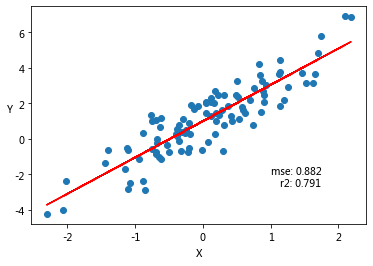

In [11]:
#以第二次抽样为例进行可视化
X_1=X_i[1][0]
Y_1=Y_i[1][0]
plt.figure()
plt.scatter(X_1,Y_1)
plt.plot(X_1,X_1*alpha_i[1]+beta_i[1],color='red')
plt.xlabel('X')
plt.ylabel('Y',rotation=0)
plt.text(1, -2, '\nmse: %1.3f'%np.array(mse_i)[1])
plt.text(1, -2.7, '\n   r2: %1.3f'%np.array(r2_i)[1])
plt.show()